# Project 2: Causality, RCTs and two-sample tests

```
From ML Theory to Practice
Universität Potsdam, fall semester 2025

Authors: Juan L. Gamella and Simon Bing
License: CC-BY-4.0 https://creativecommons.org/licenses/by/4.0/
```

## Setup

These packages should already be installed in your Python virtual environment.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Connect to the Remote Lab

We will use the queue system for this project. Let's start the connection to the Remote Lab.

In [ ]:
import causalchamber.lab as lab
rlab = lab.Lab(credentials_file = '.credentials')

### Helper functions

You can use the following helper function to monitor the completion of a list of experiments and download their data.

In [ ]:
import time
def wait_and_download(ids, download_dir):
    """
    Given a list of experiment ids, wait for them to complete and download the data.
    """
    dataframes = []
    spinner = ['⠋', '⠙', '⠹', '⠸', '⠼', '⠴', '⠦', '⠧', '⠇', '⠏']
    print(f"Waiting for data from {len(ids)} experiment{'s' if len(ids) else ''}")
    for j,experiment_id in enumerate(ids):
        data = None        
        i = 0
        while data is None:
            try:
                data = rlab.download_data(experiment_id = experiment_id, root=download_dir, verbose=False)          
            except lab.exceptions.UserError:
                print(f"  ({j+1}/{len(ids)}) waiting for {experiment_id} to finish {spinner[i]}", end='\r')
                i = (i+1) % len(spinner)            
        # Clear the line and return the data
        print(f"  ({j+1}/{len(ids)}) downloaded {experiment_id}                     ")
        dataframes.append(data.dataframe)
    return dataframes

And you can use this function to cancell all your currently queued experiments

In [ ]:
def cancel_all():
    """
    Cancel all your queued experiments.
    """
    for experiment in rlab.get_experiments(verbose=False):
        if experiment['status'] == 'QUEUED':
            try:
                rlab.cancel_experiment(experiment['experiment_id'])
            except UserError:
                continue

## Performing a controlled experiment


We will begin by performing a simple controlled experiment to test the effect of the light source brightness on the other variables of the system.

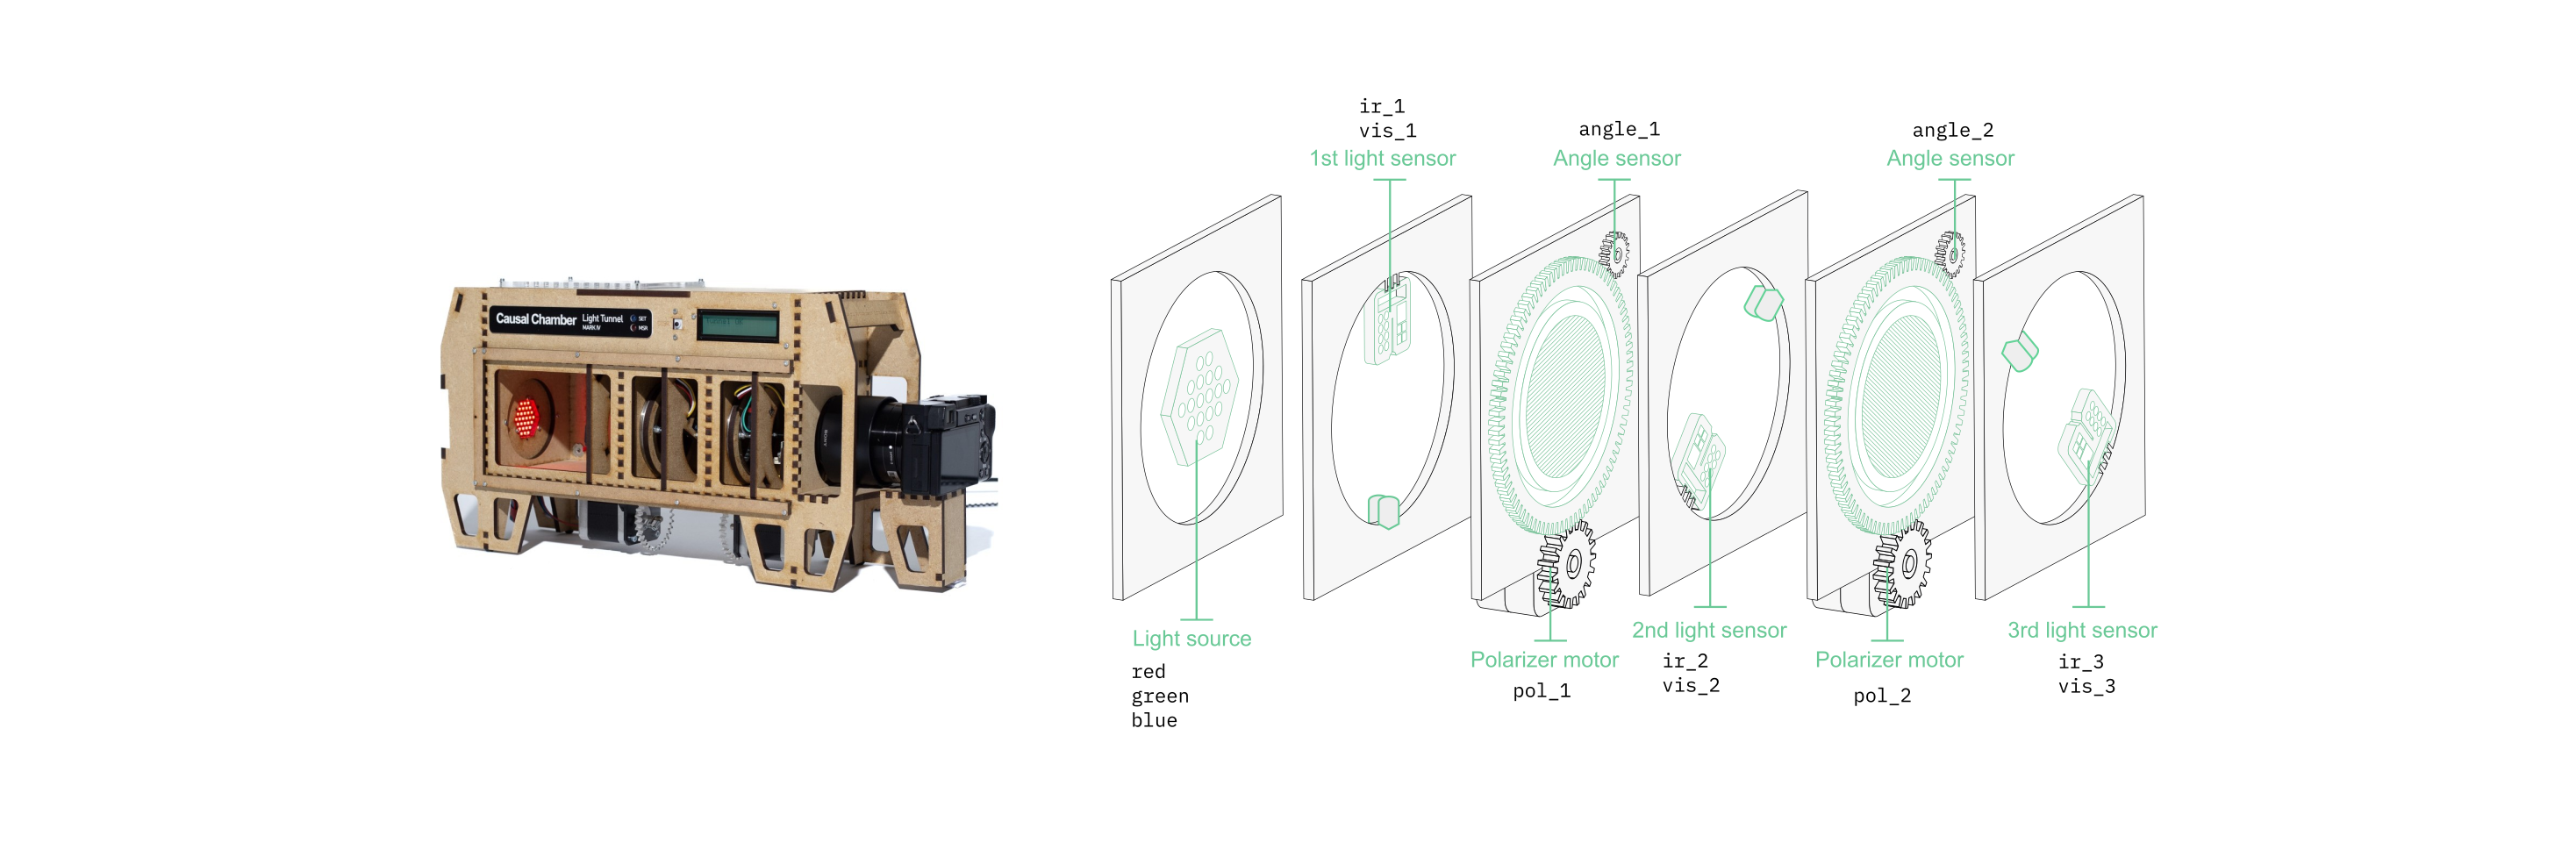

For our treatment, we will set `red=2`. As control, we will set `red=0` while keeping all other variables constant.

<mark style="background-color: #648fff;">Question:</mark> Consider the variables `ir_1, ir_2, vis_2, ir_3` and `angle_1`. Which do you expect to be affected by the change in red brightness?

> Hint: you can find a description of what these variables are [here](https://cchamber-box.s3.eu-central-2.amazonaws.com/config_doc_lt_mk2_standard.pdf)

<mark style="background-color: #40E0D0;"> Task </mark> 

Create and submit two experiments:

- For the control, set `red=0` and take `n=50` measurements
- For the treatment, set `red=2` and take `n=50` measurements

Remember that you can use `wait_and_download(...)` (defined above) to wait for completion and download the data.

In [ ]:
# TODO: your code goes here

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, let's visualize the data. First, combine your control and treatment dataframes into one:

```python
combined = pd.concat([<control_df>, <treatment_df>], ignore_index=True)
```

and then you can compare the control and treatment histograms for a variable var by calling

```python
    sns.histplot(combined, x=var, hue='red')
```

Your turn!

In [ ]:
variables = ['ir_1', 'ir_2', 'vis_2', 'ir_3', 'angle_1']

# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Which variables are affected by the change in `red` values? Do they match your prediction? Why / why not?

## Performing a randomized control experiment

We will now repeat our experiment, but we will randomize our treatment and control assignments.

<mark style="background-color: #40E0D0;"> Task </mark> 

Create and submit `100` experiments where:

- Decide at random if this is a control or treatment experiment (hint: you can call `rng.choice([True, False])` to "flip a coin")
- Set `red=10` if treatment or `red=0` if control
- Collect `n=1` measurements

Then, wait for the experiments to finish and store the resulting data in a list called `dataframes`

In [ ]:
experiment_ids = []
rng = np.random.default_rng(42)

# TODO: your code goes here
# Hint: you can call rng.choice([True, False]) to "flip a coin"

dataframes = wait_and_download(experiment_ids, download_dir='todo')

<br>

<mark style="background-color: #40E0D0;"> Task </mark>

Now lets visualize the results. Again, you can combine all the data by calling

In [ ]:
data = pd.concat(dataframes, ignore_index=True)

and then plot the marginal distributions by calling

```python
sns.histplot(data, x=<variable_name>, hue='red')
```

Plot the new data and compare the distributions of treatment and effect.

In [ ]:
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Which variables are affected by the change in `red` values? What has changed with respect to the non-randomized experiment?

## Two-sample testing

Above, you visually evaluated the results to see if there was a difference between treatment and effect. But how can we do this in a quantifiable way? If our measurements contain noise, how can we make sure that what we observed was not simply chance?

Enter: the two-sample test, one of statistics oldest problems (and the one we can solve best).

### The student t-test

We will begin by looking at perhaps one of the oldest (and still widely used) two-sample tests: The student [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)

In [ ]:
from scipy.stats import ttest_ind

Let's try the t-test on the data from our randomized experiment above. We will compare the treatment vs. control distributions of each variable.

<mark style="background-color: #648fff;">Question:</mark> Before you start, what do you expect the p-values to look like for each variable? Which do you expect to be higher / lower? Explain your reasoning.

<mark style="background-color: #40E0D0;"> Task </mark> 

Compute and print the p-value resulting from comparing the treatment & control distributions for each variable. To compute the p-value, you can call

```python
ttest_ind(<control_sample>, <treatment_sample>).pvalue
```

In [ ]:
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Did the results match your expectations?

<mark style="background-color: #648fff;">Question:</mark> In your own words, explain what the null hypothesis of the test is in this case, and what the p-value represents.

<mark style="background-color: #648fff;">Question:</mark> Say you want to reject the null-hypothesis at level $\alpha = 0.05$. For which variables do you find a significant effect?

### Evaluating level and power

We will now evaluate the level and power of the t-test.

<mark style="background-color: #648fff;">Question:</mark> Can you explain, in your own words, the difference between a type-I error and a type-II error?

<mark style="background-color: #648fff;">Question:</mark> Based on your answer, what is the difference between level and power?

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, we will evaluate the level and power of the t-test on a hundred repetitions of our experiment.

To save time, we will do the randomization at the _observation_ level, instead of at the experiment level. In particular, create and submit 100 experiments where,

For each experiment:

1. flip a coin (i.e., `rng.choice([True, False])`) and set `red=0` or `red=2` depending on the result
2. collect one measurement
3. repeat steps 1 and 2 ten times, for a total of `100` measurements
4. submit the experiment

You can store the resulting experiment ids in a list called `experiment_ids`. Download the results using `wait_and_download(...)` and store them into a list called `dataframes`.

We suggest you print the experiment ids and store them somehwere (e.g., in a text cell of this notebook) so you don't have to resubmit the experiments if you close the notebook.

In [ ]:
experiment_ids = []
rng = np.random.default_rng(42)

for k in range(100): # Outer loop for 100 experiments
    experiment = rlab.new_experiment(chamber_id = 'lt-ptdm-fu3p', config = 'standard')
    for i in range(100): # Inner measurement loop
        # TODO: your code goes here
        pass
print(repr(experiment_ids)) # Print experiment ids so you can access them at any time

In [ ]:
dataframes = wait_and_download(experiment_ids, download_dir='todo')

<br>

Now we will check how often the null is rejected in the 100 experiments for each of our variables.

<mark style="background-color: #648fff;">Question:</mark> At level $\alpha=0.05$, in what percentage of the tests will the null be rejected (i.e., p-value < $\alpha$) `ir_1`, `ir_2`, `vis_2`, `ir_3` and `angle_1`?

<mark style="background-color: #40E0D0;"> Task </mark> 

Now compute the p-values for each variable across the 100 experiments and store them in a dictionary (see e.g., `pvals` below). Compute and print the rejection rate for each variable, i.e., the proportion of experiments in which the null is rejected at level $\alpha=0.05$.

Note: you can separate the control and treatment observations in a dataframe `df` by calling

```python
df_control = df[df.red == 0]
df_treatment = df[df.red != 0]
```

And you can compute the p-value by calling

```python
ttest_ind(df_control[variable], df_treatment[variable]).pvalue
```



In [ ]:
variables = ['ir_1', 'ir_2', 'vis_2', 'ir_3', 'angle_1']
pvals = {var: [] for var in variables}
level = 0.05

# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Did you predictions hold?

<mark style="background-color: #40E0D0;"> Task </mark> 

Plot the distributions of p-values for each variable across the 100 experiments. Use [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html).

In [ ]:
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Would you say the test is valid at level $\alpha$? Explain your reasoning.

<mark style="background-color: #40E0D0;"> Task </mark> 

Using the stored p-values for `angle_1`, compute the rejection rate for different values of $\alpha$ (see variable `levels` below). Then, make a plot of the results, with `alpha` on the x-axis and the rejection rate on the y-axis. Overlay the line $y=x$ on this plot.

In [ ]:
levels = np.linspace(0,1,100)
rejection_rates = []
# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Does the test provide the correct level for all values of $\alpha$? Why / why not?

<mark style="background-color: #648fff;">Question:</mark> If this were an ideal test, what should the level vs. type-I error curve look like?

### Using a non-parametric test

Now, let's repeat our analysis using the non-parametric [Rank-Sum test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [ ]:
from scipy.stats import ranksums

<mark style="background-color: #40E0D0;"> Task </mark> 

As for the t-test, compute the p-values for each variable across all of the 100 experiments. Print the rejection rates for $\alpha=0.05$ and plot the distributions of p-values as above.

In [ ]:
variables = ['ir_1', 'ir_2', 'vis_2', 'ir_3', 'angle_1']
pvals = {var: [] for var in variables}
level = 0.05

# TODO: your code goes here

<mark style="background-color: #648fff;">Question:</mark> Would you say the rank-sum test is more or less powerful than the t-test? Explain your reasoning.

<mark style="background-color: #648fff;">Question:</mark> Look at the distribution of p-values for `angle_1`? Why does it now follow a uniform distribution?

<mark style="background-color: #648fff;">Question:</mark> What will the level vs. type-I error curve look like for `angle_1`? 

<mark style="background-color: #40E0D0;"> Task </mark> 

Plot the level vs. type-I error curve for `angle_1` and check your answer.

In [ ]:
levels = np.linspace(0,1,100)
actual_rates = []
# TODO: your code goes here

## Early-stopping

So far, we have used a fixed sample size for our tests. Above, we collect a total of `n=100` observations between the treatment and control groups.

For some strong effects, such as the effect on `ir_1`, we might not need so many observations to be able to confidently reject the null.

Imagine now that our experiments are very expensive and we want to collect only the strictly necessary data. As a first approach, we might try "early stopping", i.e., collecting data until the null-hypothesis is rejected.

<mark style="background-color: #40E0D0;"> Task </mark> 

Write a function

```python
def simulate_early_stopping(alpha, variable):
    ...
```
where we will compute our rejection rates when we do early-stopping. The function should take in a level `alpha` and, assuming you stored the previous experiments in a list called `dataframes`, run the following procedure for the given `variable` (e.g., `ir_1` or `angle_1`).

1. Start a counter, e.g., `rejected=0` and an emtpy list `n_util_stop = []`, to store how many observations we needed until rejecting the null.
2. For each of the 100 experiments in `dataframes`, create two empty samples `sample_control` and `sample_treatment`, and add the first observation from the control (`red==0`) and treatment (`red!=0`) assignments
    1. Add the next observation to `sample_control` and `sample_treatment`, and compute the p-value of the rank-sum test
    2. If the p-value is smaller than `alpha`, reject the null. Increase the counter `rejected` and store how many observations were needed. Move on to the next experiment (step 2).
    3. If there are no more observations left in the experiment, move on to the next experiment (step 2).
    4. Otherwise, go back to (A)

Once all the experiments are done, print the resulting rejection rate (percentage) and the avg. number of observations until rejection.

In [1]:
def simulate_early_stopping(alpha, variable):
    rejected = 0
    n_until_stop = []
    for df in enumerate(dataframes):
        # TODO: your code here
        pass
    # Print results
    print(f"Rejection rate for {variable}: {rejected / len(dataframes) * 100}%")
    print(f"avg. no. of observations {variable}: {np.mean(n_until_stop)}")

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, compute the rejection rate and observations-to-rejection for `'ir_1', 'ir_2', 'vis_2', 'ir_3'`.

In [ ]:
['ir_1', 'ir_2', 'vis_2', 'ir_3']
# TODO: your code here

<mark style="background-color: #648fff;">Question:</mark> Are the rejection rates lower or higher than in our previous experiment?

<mark style="background-color: #648fff;">Question:</mark> For each variable, how many observations did we use until rejection? Why are these numbers different?

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, compute the rejection rate and observations-to-rejection for `angle_1`.

In [ ]:
#TODO: your code here

<mark style="background-color: #648fff;">Question:</mark> What is the rejection rate now? Why is this happening? Would you use this "early-stopping" approach in practice?

## Two-sample tests for other kinds of data

For this part we will use an existing dataset composed of images collected from the light tunnel.

To download it, first choose where it should be download it

In [ ]:
DOWNLOAD_DIR = './'

and download it

In [ ]:
from causalchamber.datasets import Dataset

# Download the dataset and store it, e.g., in the current directory
dataset = Dataset('lt_color_regression_v1', root=DOWNLOAD_DIR, download=True)

The dataset (description [here](https://github.com/juangamella/causal-chamber/tree/main/datasets/lt_color_regression_v1)) consists of experiments where the light source color is set at random, and images are captured under different configurations of the polarizer and camera sensors.

Let's load two of these experiments.

In [ ]:
# Load the observations and images from an experiment (see experiment names below)
# Choose
sample_a = dataset.get_experiment(name='reference').as_image_array(size='100')
sample_b = dataset.get_experiment(name='pol_1_45').as_image_array(size='100')

in the first experiment, the first polarizer is kept at `pol_1=0` degrees, while in the second it is kept at `pol_1=45` degrees.

Let's explore the dataset by plotting some images:

In [ ]:
def plot_random_images(sample, n=5, seed=42):
    plt.figure(figsize=(n*2, 2))
    rng = np.random.default_rng(seed)
    for i,j in enumerate(rng.integers(len(sample), size=n)):
        plt.subplot(1,n,i+1)
        plt.imshow(sample[j])        

In [ ]:
plot_random_images(sample_a)

In [ ]:
plot_random_images(sample_b)

As you can see, it is quite hard to tell the difference at plain sight. If you look closer, you can notice the difference int the shape of the blur on the top of the image.

That's quite a subtle difference.

<mark style="background-color: #648fff;">Question:</mark> How can we test if these two samples are different? How would you apply the t-test or rank-sum test to solve this problem?

Write down some ideas and we'll brainstorm in class next week.

Next week (project 3) we will build a two-sample test using a neural network. This is a modern approach that you can use to build two-sample tests for virtually any kind of data.

Here is the recommended reading.

> [[Link](https://insightful-data-lab.com/2025/08/23/classifier-two-sample-tests-c2sts/)] A quick bullet-point primer
> 
> [[PDF](https://arxiv.org/pdf/1610.06545)] Lopez-Paz, David, and Maxime Oquab. "Revisiting classifier two-sample tests." arXiv preprint arXiv:1610.06545 (2016).